In [5]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the diabetes_data.csv.
import pandas as pd
diabetes_data_df = pd.read_csv('https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/Stephen/diabetes_data.csv')
# Display the first few rows
diabetes_data_df.head()


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


# Correlation Analysis

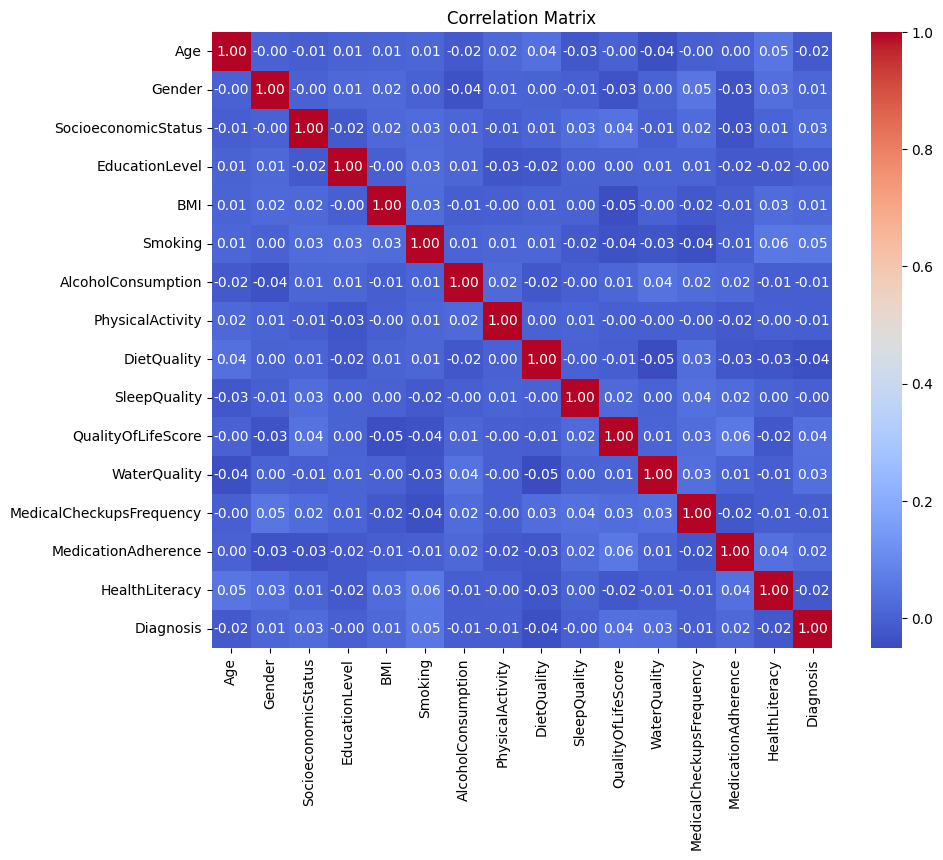

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation between demographic and lifestyle factors with the diabetes diagnosis
correlation_matrix = diabetes_data_df[[
    'Age', 'Gender', 'SocioeconomicStatus', 'EducationLevel',
    'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality', 'QualityOfLifeScore', 'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy', 'Diagnosis'
]].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

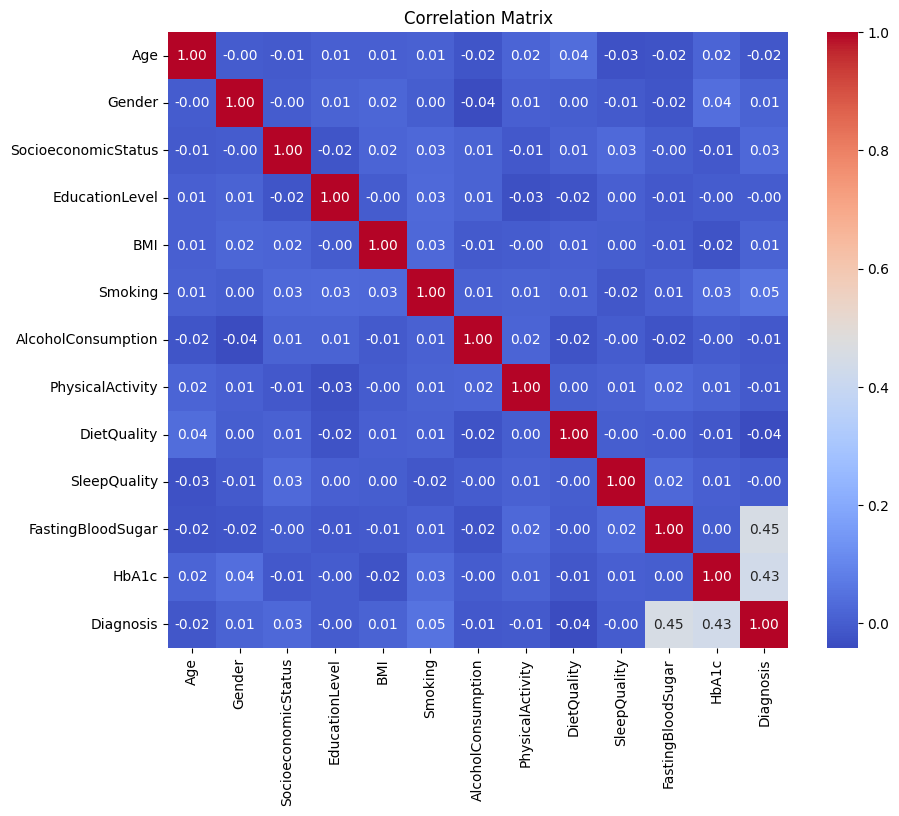

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation between demographic and lifestyle factors with the diabetes diagnosis
correlation_matrix = diabetes_data_df[[
    'Age', 'Gender', 'SocioeconomicStatus', 'EducationLevel',
    'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality','FastingBloodSugar', 'HbA1c', 'Diagnosis'
]].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

 # Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prepare the data for logistic regression
X = diabetes_data_df[[
     'Age', 'Gender', 'SocioeconomicStatus', 'EducationLevel',
    'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality','FastingBloodSugar', 'HbA1c',
]]
y = diabetes_data_df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1])
print("ROC AUC Score:", roc_auc)

Confusion Matrix:
 [[288  59]
 [ 62 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       347
           1       0.72      0.71      0.72       217

    accuracy                           0.79       564
   macro avg       0.77      0.77      0.77       564
weighted avg       0.78      0.79      0.79       564

ROC AUC Score: 0.8579264000849944


ROC AUC Score: 0.49 - This is the area under the ROC curve. A score of 0.5 indicates that the model is performing no better than random guessing. A score of 0.492 suggests that the model has poor discriminatory power and is not effective at distinguishing between the two classes (diabetic vs. not diabetic).

# Chi-Square Test for Categorical Variables

In [12]:
from scipy.stats import chi2_contingency

chi_square_results = {}
categorical_columns = ['Age', 'Gender', 'SocioeconomicStatus', 'EducationLevel',
    'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality','FastingBloodSugar', 'HbA1c', ]

for column in categorical_columns:
    contingency_table = pd.crosstab(diabetes_data_df[column], diabetes_data_df['Diagnosis'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[column] = {'Chi2': chi2, 'p-value': p}

# Display the results of Chi-Square tests
for column, results in chi_square_results.items():
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2: {results['Chi2']}, p-value: {results['p-value']}\n")


Chi-Square Test for Age:
Chi2: 70.40136358915225, p-value: 0.46405943184194764

Chi-Square Test for Gender:
Chi2: 0.21349874059657412, p-value: 0.6440388394169699

Chi-Square Test for SocioeconomicStatus:
Chi2: 1.7746965322312631, p-value: 0.41174614760627715

Chi-Square Test for EducationLevel:
Chi2: 1.5952687469072258, p-value: 0.6604630748668663

Chi-Square Test for BMI:
Chi2: 1879.0000000000002, p-value: 0.4891534152597604

Chi-Square Test for Smoking:
Chi2: 5.203067196894132, p-value: 0.022547069433512756

Chi-Square Test for AlcoholConsumption:
Chi2: 1879.0000000000002, p-value: 0.4891534152597604

Chi-Square Test for PhysicalActivity:
Chi2: 1879.0000000000005, p-value: 0.489153415259759

Chi-Square Test for DietQuality:
Chi2: 1879.0000000000005, p-value: 0.489153415259759

Chi-Square Test for SleepQuality:
Chi2: 1879.0000000000002, p-value: 0.4891534152597604

Chi-Square Test for FastingBloodSugar:
Chi2: 1879.0000000000005, p-value: 0.489153415259759

Chi-Square Test for HbA1c:


In [ ]:
from scipy.stats import chi2_contingency

chi_square_results = {}
categorical_columns = ['Smoking', 'AlcoholConsumption', 'PhysicalActivity']

for column in categorical_columns:
    contingency_table = pd.crosstab(diabetes_data_df[column], diabetes_data_df['Diagnosis'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[column] = {'Chi2': chi2, 'p-value': p}

# Display the results of Chi-Square tests
for column, results in chi_square_results.items():
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2: {results['Chi2']}, p-value: {results['p-value']}\n")

Chi-Square Test for Smoking:
Chi2: 5.203067196894132, p-value: 0.022547069433512756

Chi-Square Test for AlcoholConsumption:
Chi2: 1879.0000000000002, p-value: 0.4891534152597604

Chi-Square Test for PhysicalActivity:
Chi2: 1879.0000000000005, p-value: 0.489153415259759

